# Exploratory Data Analysis with Seaborn
### In this project-based course, we will employ the statistical data visualization library, Seaborn, to discover and explore the relationships in the Breast Cancer Wisconsin (Diagnostic) Data Set. We will cover key concepts in exploratory data analysis (EDA) using visualizations to identify and interpret inherent relationships in the data set, produce various chart types including histograms, violin plots, box plots, joint plots, pair grids, and heatmaps, customize plot aesthetics and apply faceting methods to visualize higher dimensional data.

## Task 1: Importing the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv(r"C:\Users\ska_p\OneDrive\Desktop\Coursera Courses and Degrees\Exploratory Data Analysis with Seaborn\data.csv")

## Task 2: Separate Target from Features
### Now that the data set is in memory, we can explore the characteristics of its attributes and instances.
### We will drop columns that cannot be used for analysis and classification. After producing descriptive statistics about the data, we will separate the target from the features.
### The target contains the diagnosis with binary class labels, M or B, for malignant and benign tumors respectively.

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Checking out the names of all the columns
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# Separating our target column
y = data.diagnosis

# Creating a list of columns to drop, which will not be needed for the following analysis
drop_cols = ["id", "Unnamed: 32", "diagnosis"] # Also dropping the "diagnosis" target column since we have separated it

# Creating the final Features dataframe
x = data.drop(drop_cols, axis=1)

In [6]:
# Checking out the result
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# A little further exploration of the dataset
# Checking out for duplicates
x.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [8]:
# Alternative way to do this
len(x[x.duplicated()])

0

In [9]:
# Checking out for null values
x.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# Checking out the column data types
x.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

## Task 3: Diagnosis Distribution Visualization
### A very common question during model evaluation is, "Why isn't the model I've picked predictive?". Most often, it is a result of a class imbalance.
### In this task, we will visualize the target distributions, and also generate descriptive statistics about the features that summarize the central tendency, dispersion and shape of the data set's distribution.

Number of Benign tumors: 357
Number of Malignant tumors: 212


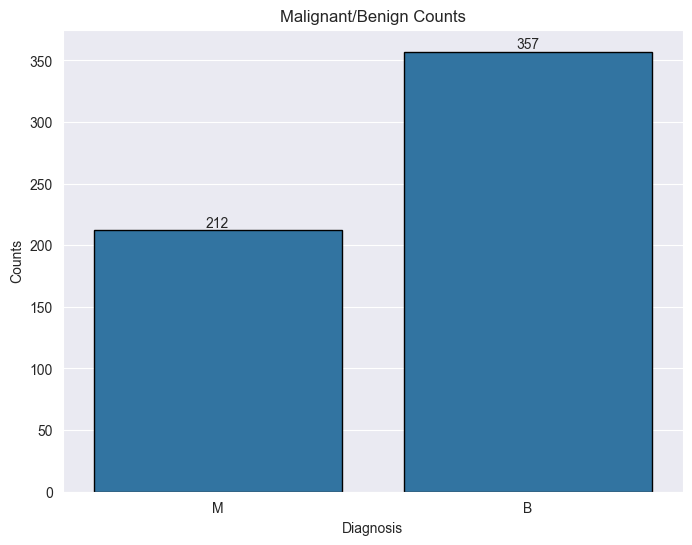

In [11]:
# Using a countplot visualization, we notice the class imbalance present in our target "Diagnosis" variable
plt.figure(figsize=(8,6), facecolor="white")
sns.set_style(style="darkgrid")

ax = sns.countplot(x=y, edgecolor="black")
ax.set_title("Malignant/Benign Counts")
ax.set_ylabel("Counts")
ax.set_xlabel("Diagnosis")
ax.bar_label(ax.containers[0])

B, M = y.value_counts()
print("Number of Benign tumors:", B)
print("Number of Malignant tumors:", M)

In [12]:
# Some descriptive statistics to explore the feature dataset a bit further
# Differences in value ranges (orders of magnitude) might indicate that we will have to normalize/standardize the data
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Task 4: Visualizing Standardized Data with Seaborn
### As the columns in the data set take on values of varying range, we need to standardize the data before proceeding with further analysis and visualization. 
### To begin feature analysis, we use Seaborn's Violin Plot. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. 

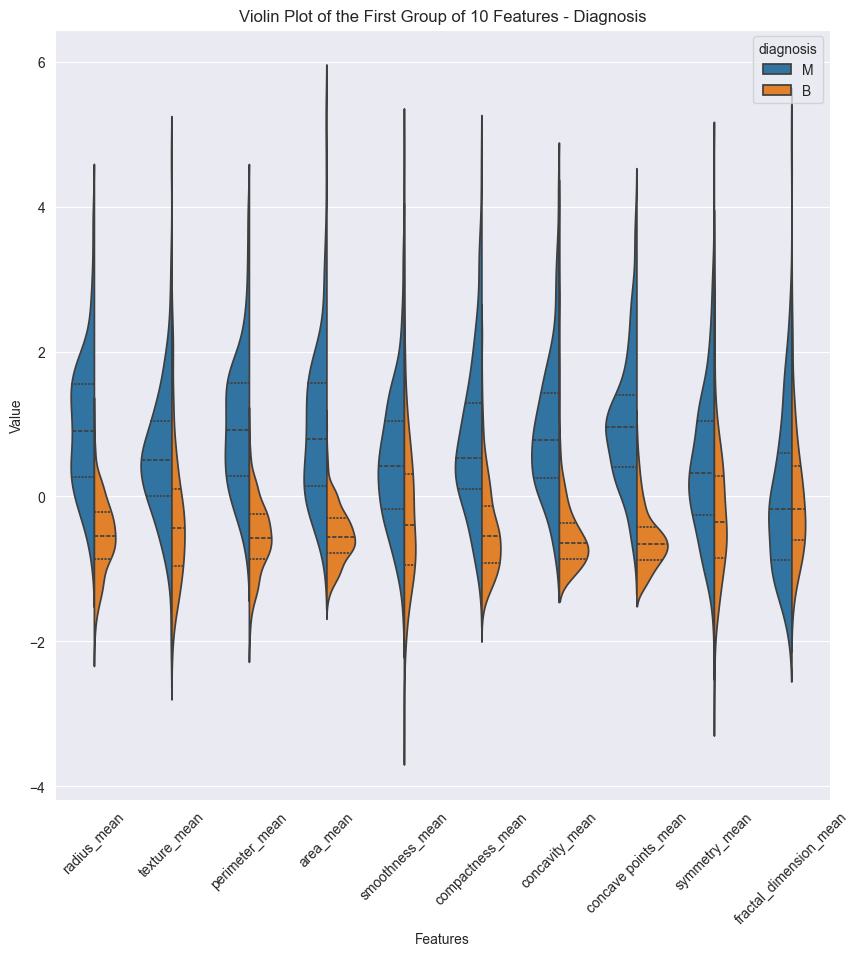

In [13]:
# Greatly varying value ranges mean we have to standardize the features, before any analysis and modeling
# Extreme differences in ranges can result in negative impact on the machine learning models
# Features with higher values will be weighed more heavily in the model
data = x
standardized_data = (data - data.mean()) / data.std()

# Concatenate our target vector with the feature matrix
# We will break the 30 features into groups of ten
data = pd.concat([y, standardized_data.iloc[:, 0:10]], axis=1)

# For the Violin Plot, we need to unpivot the dataframe into a wide format (from the long format it is now in)
# We do this using the melt method from pandas
data = pd.melt(data, id_vars="diagnosis", var_name="Features", value_name="Value")

plt.figure(figsize=(10,10))
sns.violinplot(data=data, x="Features", y="Value", hue="diagnosis", split=True, inner="quart")
plt.xticks(rotation=45)
plt.title("Violin Plot of the First Group of 10 Features - Diagnosis")
plt.show()

# Observing the violin plot, one thing to keep in mind is that features with less differentiated medians 
# will probably not give us too much predictive information, for the machine learning model we might want to build

## Task 5: Violin Plots and Box Plots
### We are using violin plots and box plots to identify features that best separate the data for classification. 
### Box plots are especially useful in identifying outliers in the data. 
### Using violin plots, we are also able to infer whether certain features are correlated. 
### To minimize clutter in our visualizations, we divide the features into three batches of ten features and produce separate plots for them.

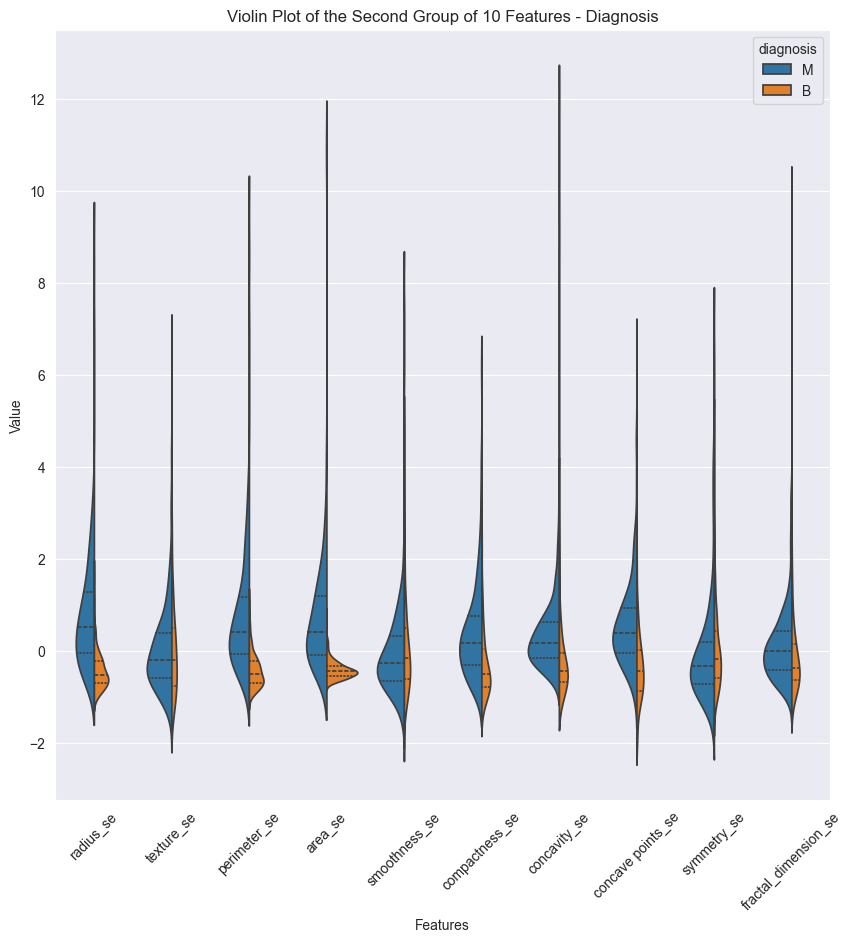

In [14]:
# Generating violin plots for the second group of data
data = pd.concat([y, standardized_data.iloc[:, 10:20]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="Features", value_name="Value")

plt.figure(figsize=(10,10))
sns.violinplot(data=data, x="Features", y="Value", hue="diagnosis", split=True, inner="quart")
plt.xticks(rotation=45)
plt.title("Violin Plot of the Second Group of 10 Features - Diagnosis")
plt.show()

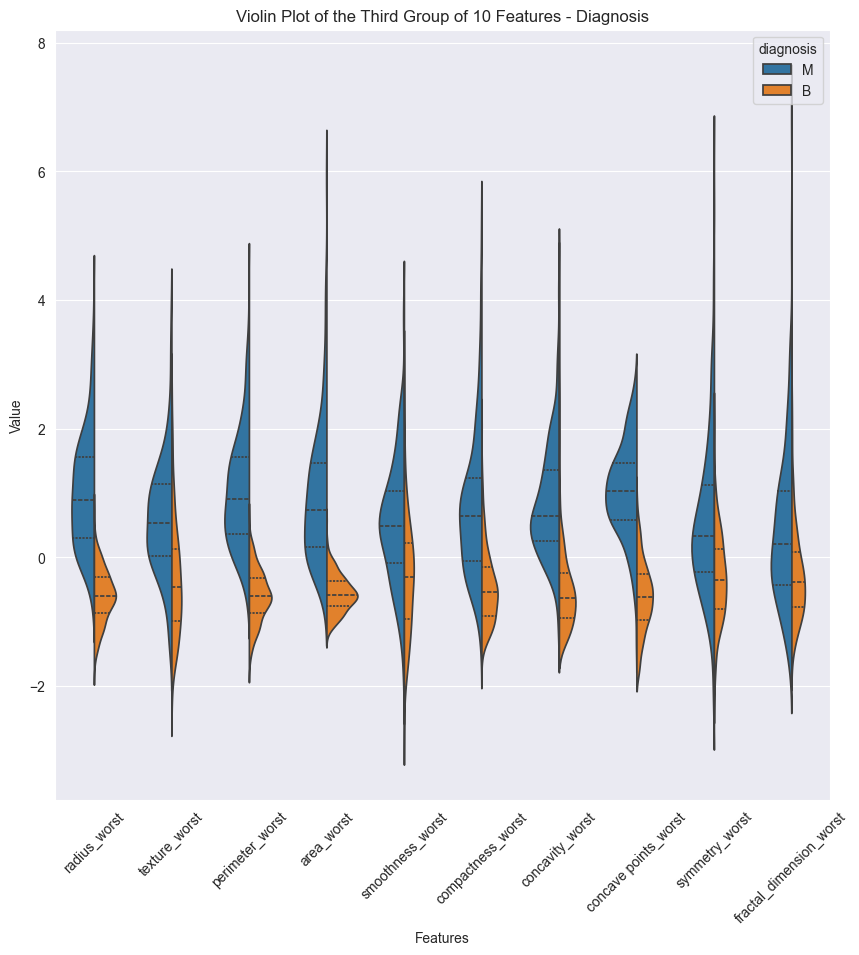

In [15]:
# Generating the final violin plot for the third group of data
data = pd.concat([y, standardized_data.iloc[:, 20:30]], axis=1)

# For the Violin Plot, we need to unpivot the dataframe into a wide format (from the long format it is now in)
# We do this using the melt method from pandas
data = pd.melt(data, id_vars="diagnosis", var_name="Features", value_name="Value")

plt.figure(figsize=(10,10))
sns.violinplot(data=data, x="Features", y="Value", hue="diagnosis", split=True, inner="quart")
plt.xticks(rotation=45)
plt.title("Violin Plot of the Third Group of 10 Features - Diagnosis")
plt.show()

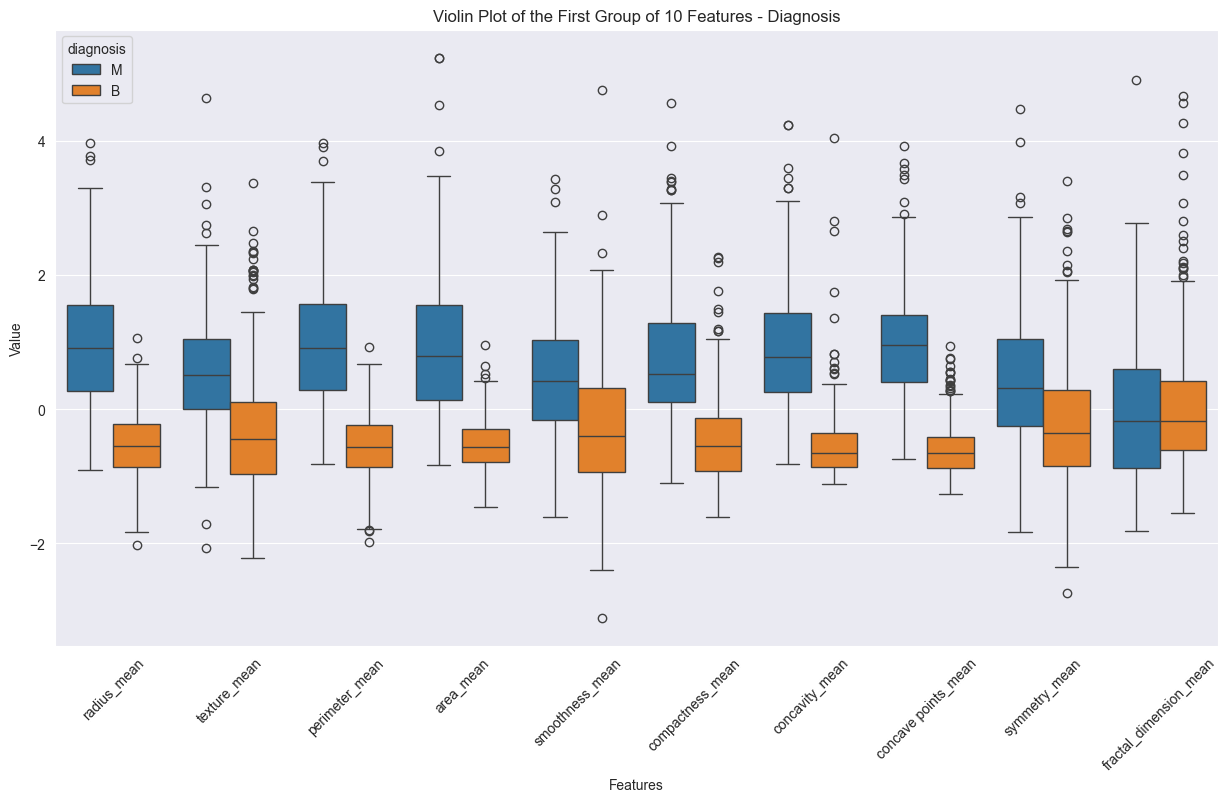

In [16]:
# Generating box plots for the three groups of data, to observe different aspects, such as outliers, for example
data = pd.concat([y, standardized_data.iloc[:, 0:10]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="Features", value_name="Value")

plt.figure(figsize=(15,8))
sns.boxplot(data=data, x="Features", y="Value", hue="diagnosis")
plt.xticks(rotation=45)
plt.title("Violin Plot of the First Group of 10 Features - Diagnosis")
plt.show()

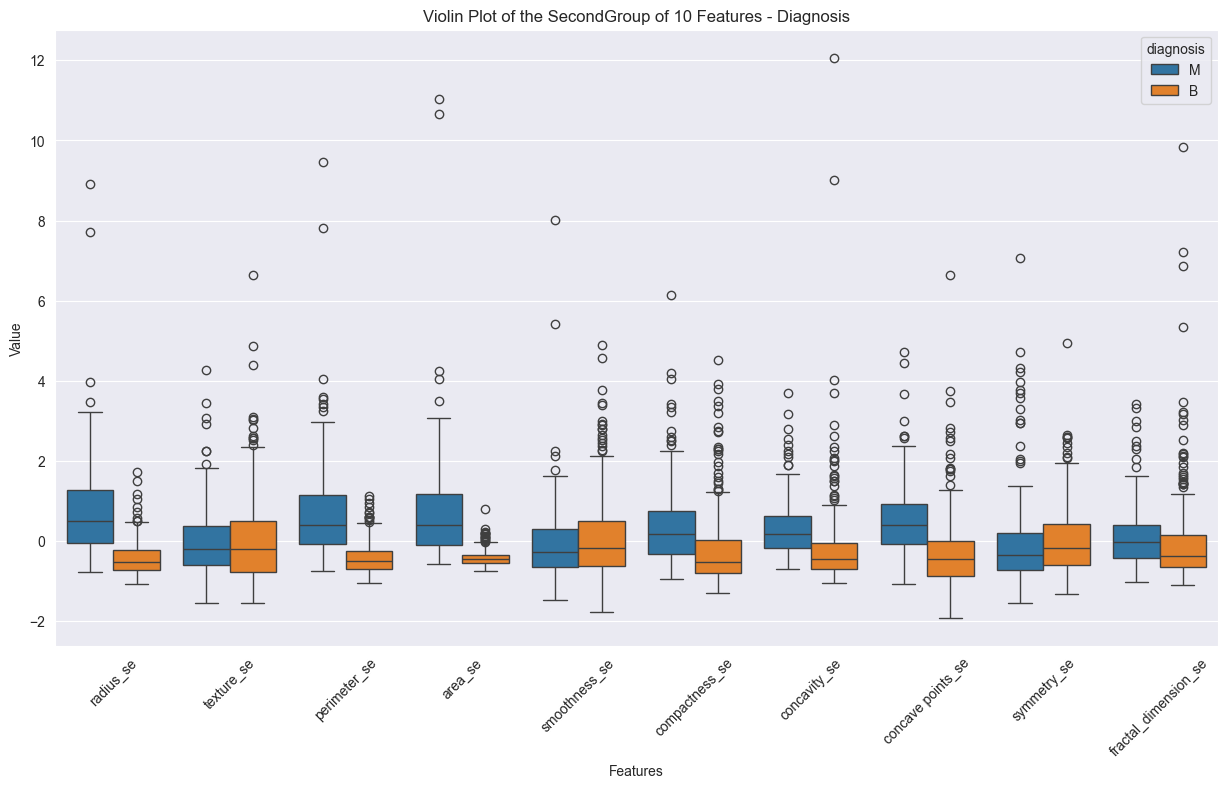

In [17]:
data = pd.concat([y, standardized_data.iloc[:, 10:20]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="Features", value_name="Value")

plt.figure(figsize=(15,8))
sns.boxplot(data=data, x="Features", y="Value", hue="diagnosis")
plt.xticks(rotation=45)
plt.title("Violin Plot of the SecondGroup of 10 Features - Diagnosis")
plt.show()

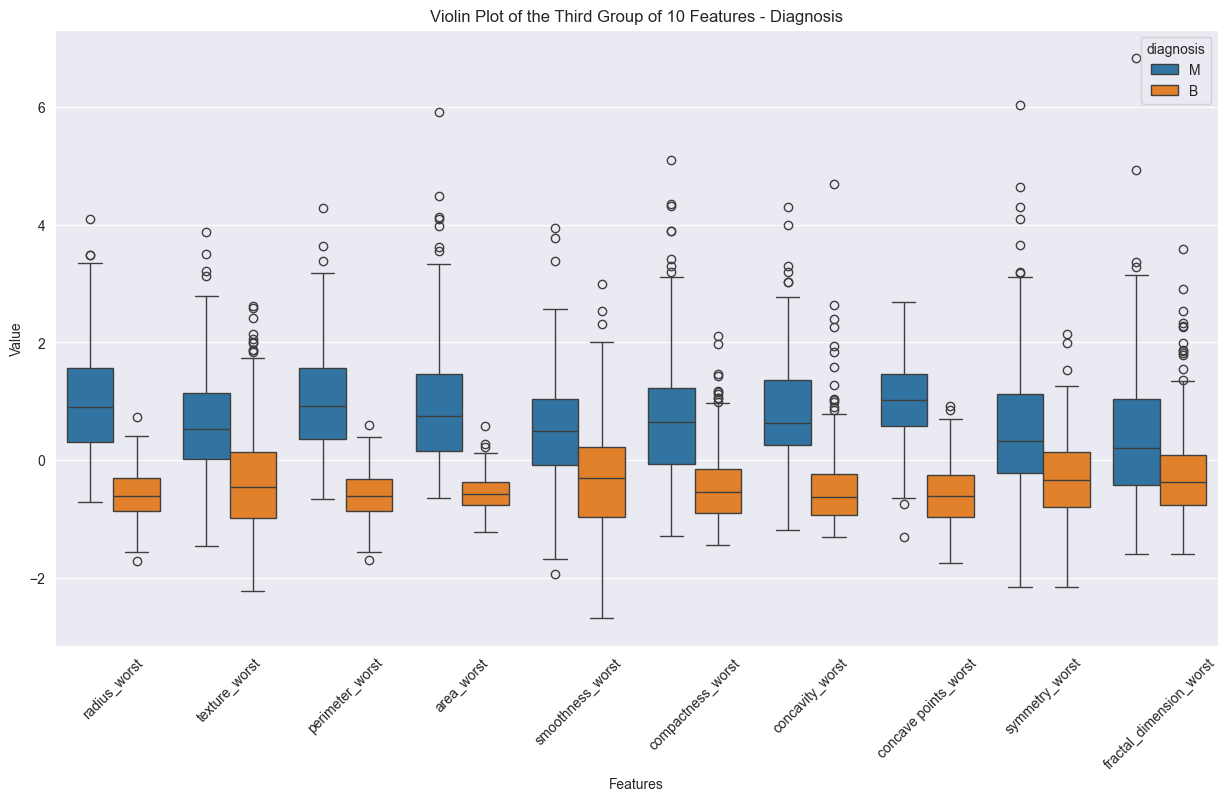

In [18]:
data = pd.concat([y, standardized_data.iloc[:, 20:30]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="Features", value_name="Value")

plt.figure(figsize=(15,8))
sns.boxplot(data=data, x="Features", y="Value", hue="diagnosis")
plt.xticks(rotation=45)
plt.title("Violin Plot of the Third Group of 10 Features - Diagnosis")
plt.show()

## Task 6: Using Joint Plots for Feature Comparison
### Joint plots come in handy to illustrate the relationship between two features. 
### We will use seaborn's jointplot() method to draw a scatter plot with marginal histograms and kernel density fits. 
### We can examine the relationship between any two features using the Pearson correlation coefficient of the regression through our scatter plot.

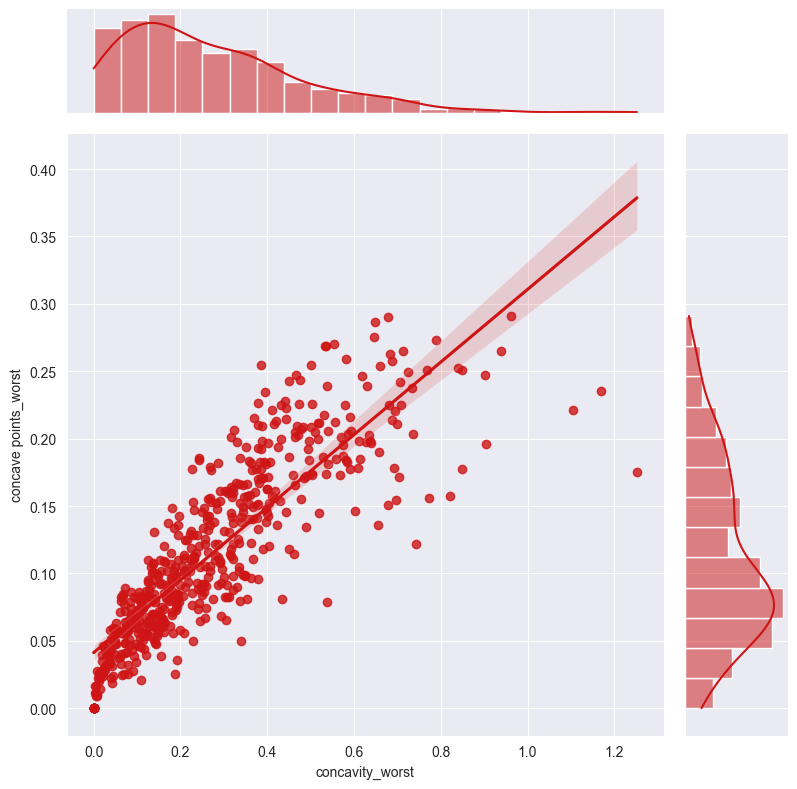

In [19]:
# We noticed in the violin plots (and also in some of the boxplots) that some feature pairs seem to be correlated
# Such correlations might throw off the machine learning model to follow, so we need to remove such correlated pairs
# Joint Plots is a good way to search for this kind of correlated features
# Lets check out features "concavity_worst" and "concave points_worst" with a joint plot
sns.jointplot(x=x.loc[:, 'concavity_worst'], y=x.loc[:, 'concave points_worst'], kind="reg", color="#ce1414", height=8)
plt.show()

In [20]:
# We can calculate the Pearson-r coefficient for this feature pair, and any other we might be interested in
# We can observe that these two features are very strongly correlated
import scipy.stats as stats
stats.pearsonr(x.loc[:, 'concavity_worst'], x.loc[:, 'concave points_worst'])

PearsonRResult(statistic=0.8554338603439992, pvalue=3.764097729695232e-164)

## Task 7: Observing the Distribution of Values and their Variance with Swarm Plots
### We have learned that violin plots are a great tool for visualizing sparse distributions. As our data set contains close to 600 rows, we might want to simply display each point in the same visualization. 
### This need is satisfied by Seaborn's swarmplot() method.
### A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

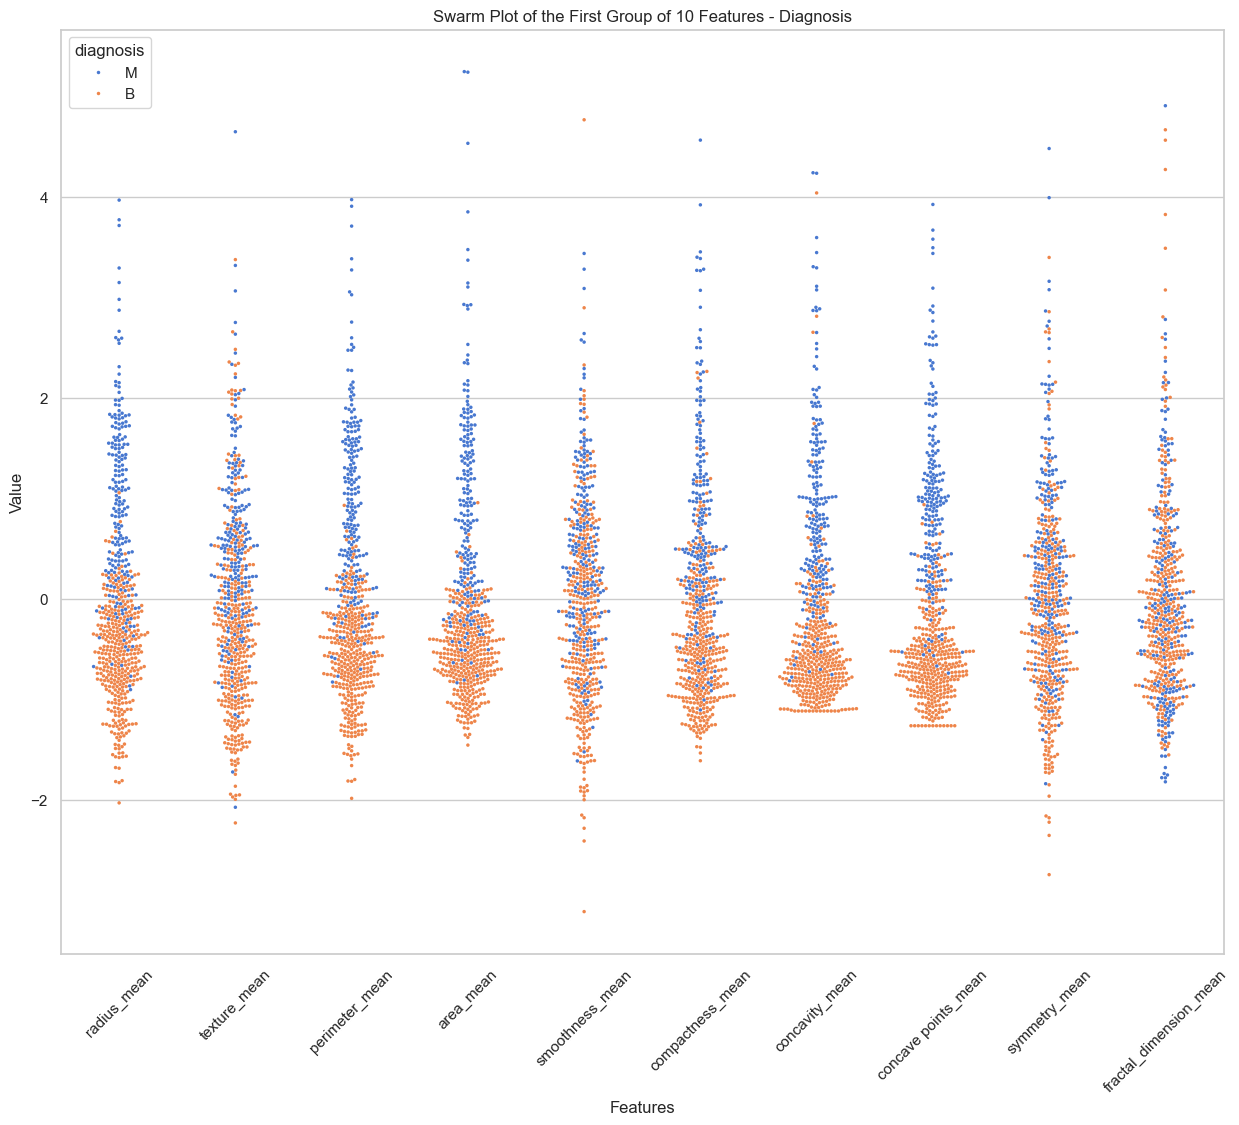

In [21]:
# Setting some aesthetic parameters for the seaborn plots
sns.set(style="whitegrid", palette="muted")

# We will use the previous handling of the dataset that we used on the first violin plot
# Again we will separate the dataset into three groups, to create three different swarm plots
# We can observe which features are best suited for classification and modeling puproses, by observing their variance and how well separated they are
# Features that are well separated will have greater peridictive power
data = x
standardized_data = (data - data.mean()) / data.std()

data = pd.concat([y, standardized_data.iloc[:, 0:10]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="Features", value_name="Value")

plt.figure(figsize=(15,12))
sns.swarmplot(data=data, x="Features", y="Value", hue="diagnosis", size=2.5)
plt.xticks(rotation=45)
plt.title("Swarm Plot of the First Group of 10 Features - Diagnosis")
plt.show()

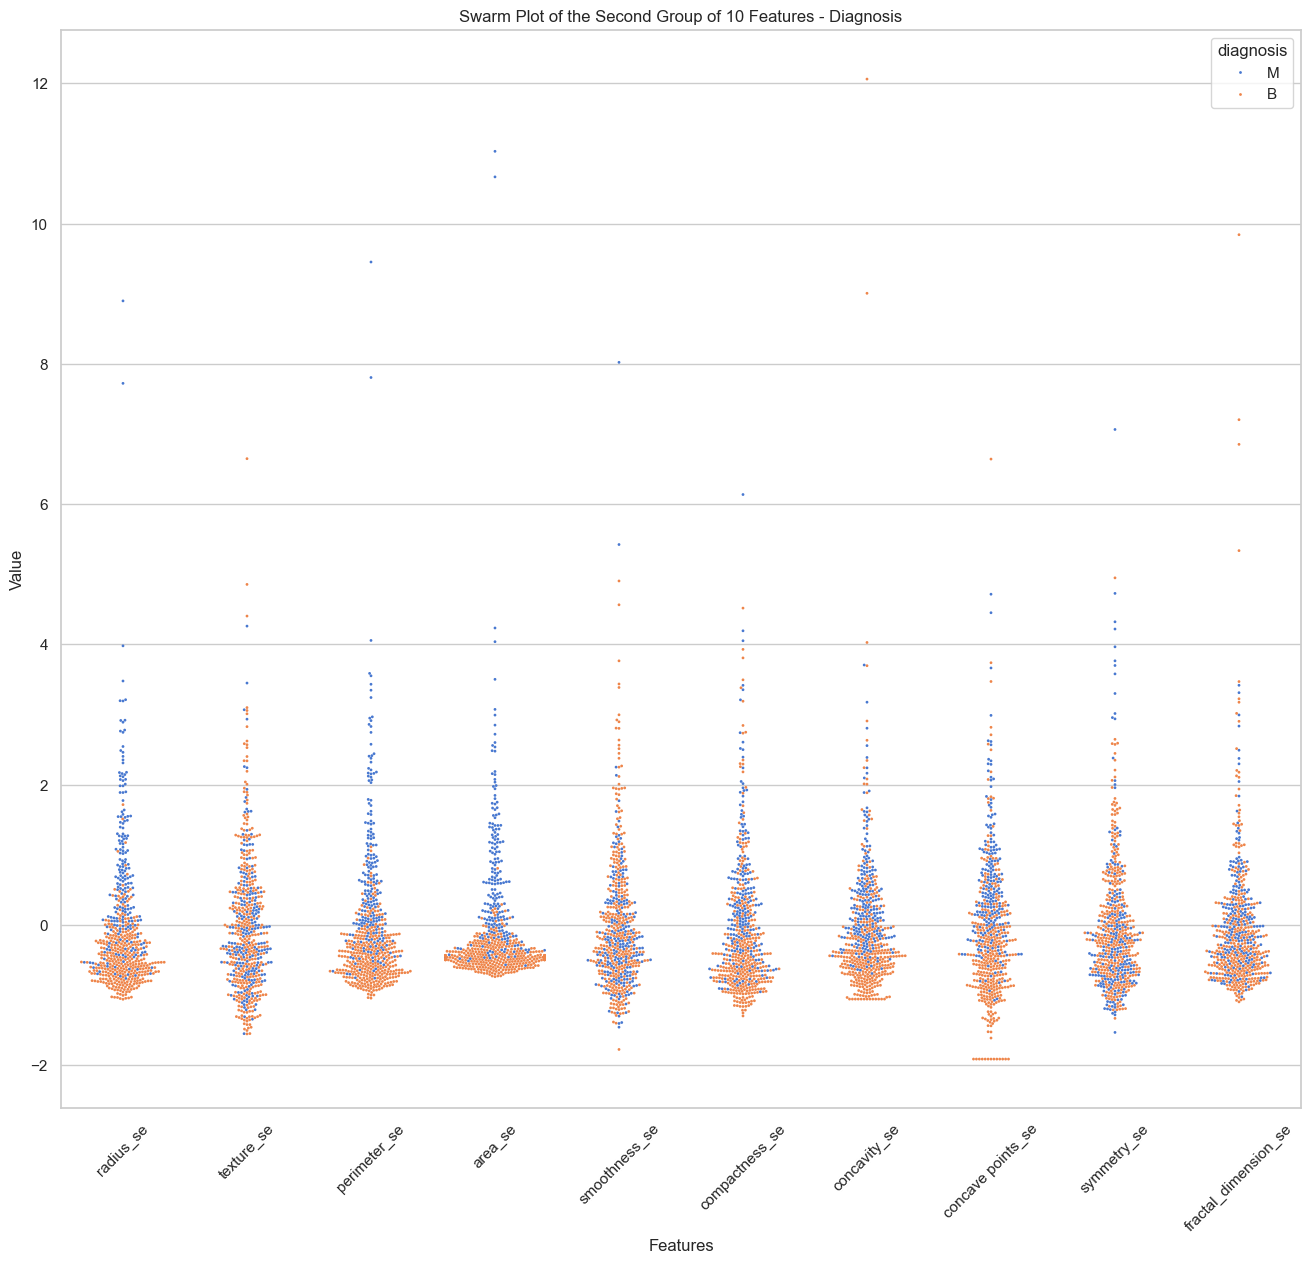

In [22]:
# Generating the other two swarm plots for the remaining data groups
data = x
standardized_data = (data - data.mean()) / data.std()

data = pd.concat([y, standardized_data.iloc[:, 10:20]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="Features", value_name="Value")

plt.figure(figsize=(16,14))
sns.swarmplot(data=data, x="Features", y="Value", hue="diagnosis", size=2)
plt.xticks(rotation=45)
plt.title("Swarm Plot of the Second Group of 10 Features - Diagnosis")
plt.show()

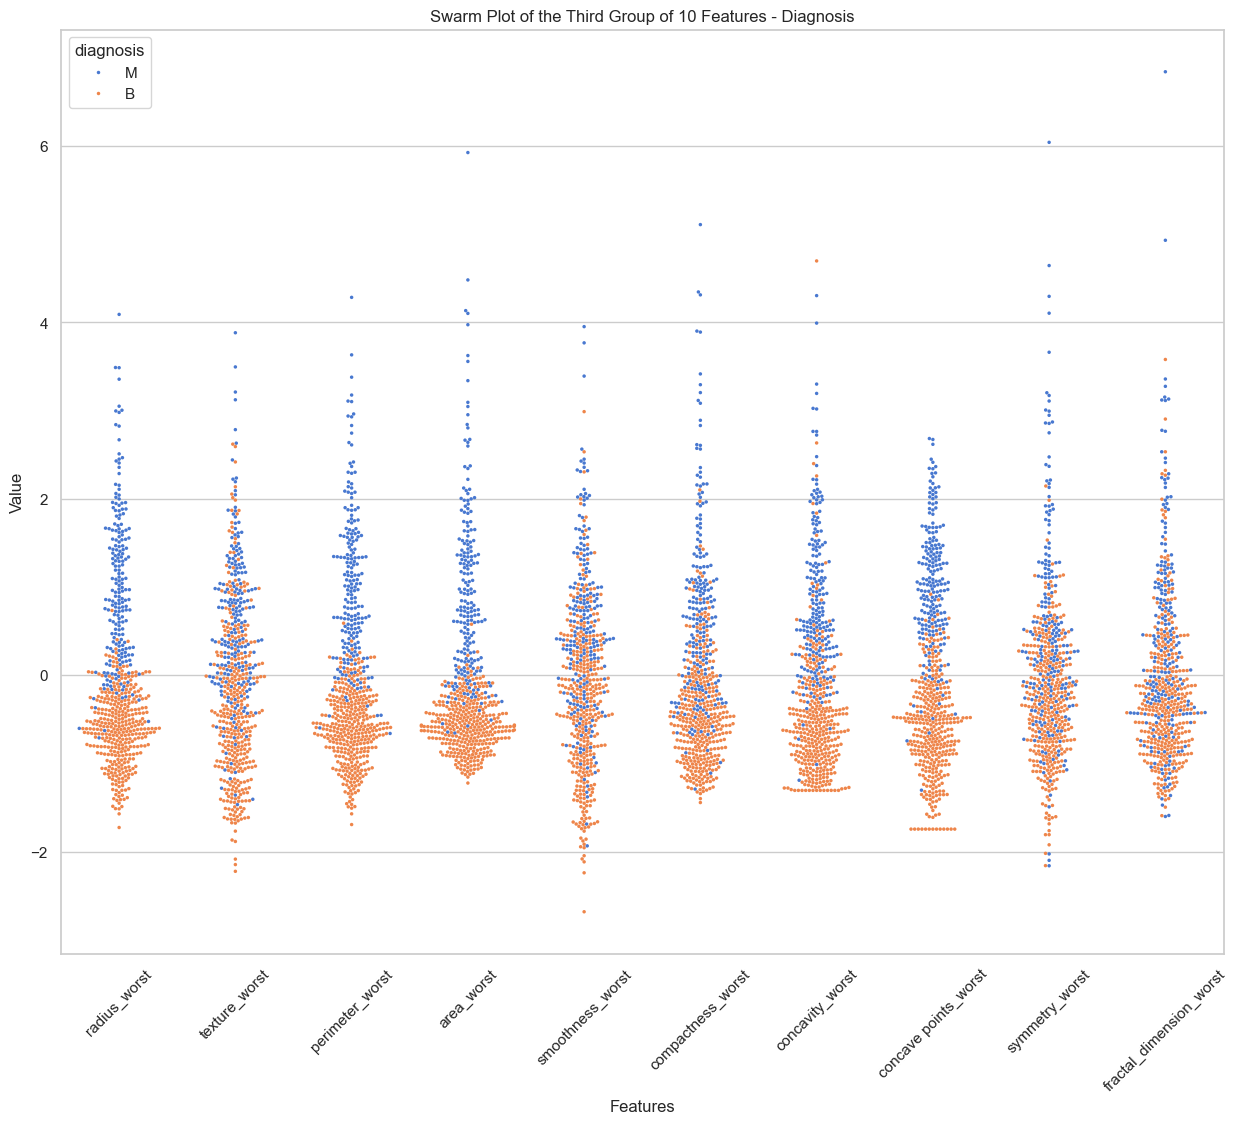

In [23]:
data = x
standardized_data = (data - data.mean()) / data.std()

data = pd.concat([y, standardized_data.iloc[:, 20:30]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="Features", value_name="Value")

plt.figure(figsize=(15,12))
sns.swarmplot(data=data, x="Features", y="Value", hue="diagnosis", size=2.5)
plt.xticks(rotation=45)
plt.title("Swarm Plot of the Third Group of 10 Features - Diagnosis")
plt.show()

## Task 8: Observing all Pairwise Correlations
### A good way to identify correlations between features is to visualize the correlation matrix as a heatmap. 
### We will make a note of the correlated features so that we can drop them from our data set before building a predictive model in the next project.
### In a possible next project, we will remove these correlated features and analyze the classification accuracy we get using XGBoost, a boosted decision tree classifier. 
### We could then employ various feature selection and feature extraction methods to get the most predictive features and improve our classification accuracy. 



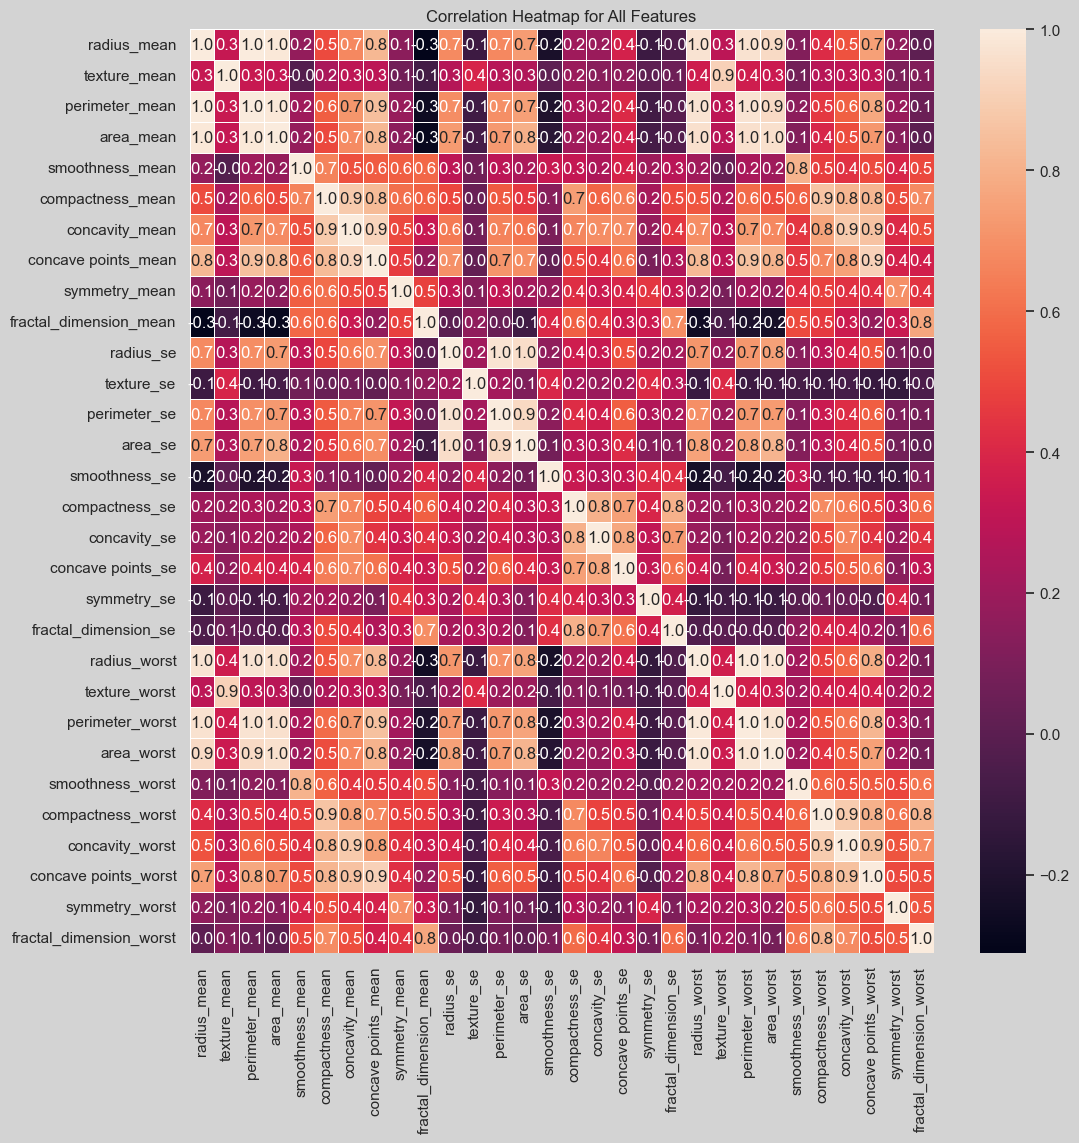

In [28]:
# Creating the Seaborn heatmap, to visualize all the correlations between the features
f, ax = plt.subplots(figsize=(12,12), facecolor="lightgrey")
sns.heatmap(x.corr(), annot=True, linewidth=0.5, fmt=".1f", ax=ax)
plt.title("Correlation Heatmap for All Features")
plt.show()

### Heatmap:
### The light colored cells indicate high correlation of the coresponding features, so this is a hint of possible actions to be taken.
### For example we might like to drop one of these paired features, for a future machine learning model building, or take advantage of the correlation in another way.
### Dark colored cells indicate the opposite, i.e. very low or negative correlation between the coresponding features.

## Final Thoughts:
### In this project we explored the feature relationships in the Breast Cancer Wisconsin (Diagnostic) Data Set, using the Data Visualization library, Seaborn.
### We created/customized different types of charts, and noticed some interesting characteristics of various features.
### In a possible next future project, we might use these insights to perform feature engineering/selection methods, for example to create a classification model for the cancer tumors.

### Thank you for taking the time to check this project out!